# Feature Engineering 👷‍♀️ 

## Feature Extraction

In [96]:
import pandas as pd
import numpy as np
from scipy.fft import fft2
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [97]:
signals = pd.read_csv("transformed_signal_data/labeled_signals.csv")
signals.head()

,Label,1 sec,2 sec,3 sec,4 sec,5 sec,6 sec,7 sec,8 sec,9 sec,...,65527 sec,65528 sec,65529 sec,65530 sec,65531 sec,65532 sec,65533 sec,65534 sec,65535 sec,65536 sec
0,ARR,-0.097857,-0.156881,-0.137816,-0.137177,-0.147684,-0.168522,-0.175891,-0.170236,-0.181131,...,-0.161495,-0.124765,-0.105196,-0.094394,-0.124967,-0.104613,-0.126682,-0.074905,-0.116527,-0.180421
1,ARR,0.119361,0.187559,0.169569,0.178590,0.211824,0.196607,0.072911,0.165885,0.083204,...,-0.141731,-0.121423,-0.113781,-0.087638,-0.097274,-0.089068,-0.105625,-0.097218,-0.123936,-0.106481
2,ARR,-0.024602,-0.036279,-0.035968,-0.030194,-0.045812,-0.093124,-0.091381,-0.128953,-0.112480,...,-0.327886,-0.308444,-0.282376,-0.269384,-0.248776,-0.247613,-0.191715,-0.186142,-0.129985,-0.122356
3,ARR,-0.508309,-0.808009,-0.721684,-0.789720,-0.767678,-0.774352,-0.772501,-0.794323,-0.794939,...,-0.953446,-0.943424,-0.971548,-0.988559,-0.994919,-0.996746,-1.015446,-1.042696,-1.040684,-1.048192
4,ARR,-0.312039,-0.495260,-0.442597,-0.465246,-0.428401,-0.444373,-0.417601,-0.453342,-0.429223,...,0.392087,0.434705,0.523518,0.592920,0.663007,0.743777,0.809435,0.822494,0.787239,0.684293


### Defining Filters 🚬

In [98]:
def apply_wave_filter(signals):
    v = np.linspace(0.5 * np.pi, 1.5 * np.pi, 15)
    peak_filter = np.sin(v)
    return pd.DataFrame(np.correlate(signals, peak_filter, mode='same'))

def fft2_filter(signals):
    return pd.DataFrame(np.abs(fft2(signals.to_frame())))

def moving_median(signals, n=10000):
    return signals.rolling(n).median()
   

### Peaks Info 🗻

In [99]:
from scipy.signal import find_peaks

def get_signals_peak_info(sigs):
    distance = 30 
    p = 5000 
    pl = 950
    w = 5 
    peaks, peaks_props = find_peaks(sigs, height=0, distance=distance, prominence=(pl, p), width=w)
    diff = np.diff(peaks)
    return np.max(diff)


### Loading Data 💽

In [100]:
signals = pd.read_csv("transformed_signal_data/labeled_signals.csv")
signals.head()


,Label,1 sec,2 sec,3 sec,4 sec,5 sec,6 sec,7 sec,8 sec,9 sec,...,65527 sec,65528 sec,65529 sec,65530 sec,65531 sec,65532 sec,65533 sec,65534 sec,65535 sec,65536 sec
0,ARR,-0.097857,-0.156881,-0.137816,-0.137177,-0.147684,-0.168522,-0.175891,-0.170236,-0.181131,...,-0.161495,-0.124765,-0.105196,-0.094394,-0.124967,-0.104613,-0.126682,-0.074905,-0.116527,-0.180421
1,ARR,0.119361,0.187559,0.169569,0.178590,0.211824,0.196607,0.072911,0.165885,0.083204,...,-0.141731,-0.121423,-0.113781,-0.087638,-0.097274,-0.089068,-0.105625,-0.097218,-0.123936,-0.106481
2,ARR,-0.024602,-0.036279,-0.035968,-0.030194,-0.045812,-0.093124,-0.091381,-0.128953,-0.112480,...,-0.327886,-0.308444,-0.282376,-0.269384,-0.248776,-0.247613,-0.191715,-0.186142,-0.129985,-0.122356
3,ARR,-0.508309,-0.808009,-0.721684,-0.789720,-0.767678,-0.774352,-0.772501,-0.794323,-0.794939,...,-0.953446,-0.943424,-0.971548,-0.988559,-0.994919,-0.996746,-1.015446,-1.042696,-1.040684,-1.048192
4,ARR,-0.312039,-0.495260,-0.442597,-0.465246,-0.428401,-0.444373,-0.417601,-0.453342,-0.429223,...,0.392087,0.434705,0.523518,0.592920,0.663007,0.743777,0.809435,0.822494,0.787239,0.684293


#### Computing Features 🧑‍💻

In [101]:
signals_2 = signals.copy()
signals_2.pop("Label")
signal_features = pd.DataFrame()

for i in range(0, 161):
    sig = signals_2.loc[i][1:].values
    medians = moving_median(pd.Series(sig))
    signal_features.loc[i, "variation"] = len(medians.unique())
    # signal_features.loc[i, "absolute_peak"] = max(medians.min(), abs(medians.max()))
    # signal_features.loc[i, "iqr"] = medians.quantile(q=.75) - medians.quantile(q=.25)
    # signal_features.loc[i, "min"] = medians.min()
    # signal_features.loc[i, "max"] = medians.max()
    # signal_features.loc[i, "std"] = medians.std()
 

In [102]:

signals_3 = signals.copy()
signals_peaks = signals_3.pop("Label")

signals_3 = (signals_3 - signals_3.mean(axis=0)) / signals_3.std(axis=0)

signals_peaks = signals_peaks.to_frame()

for i in range(0, 161):
    sig = signals_3.loc[i]
    ff2_filtered = fft2_filter(sig)[0]
    wave_filtered = apply_wave_filter(ff2_filtered)
    signal_features.loc[i, "max_peak_distance"] = get_signals_peak_info(wave_filtered[0])
    
signal_features["Label"] = signals_peaks["Label"]
    

In [103]:
signal_features.head()

,variation,max_peak_distance,Label
0,7616.0,20406.0,ARR
1,4560.0,23949.0,ARR
2,9824.0,25709.0,ARR
3,7791.0,34835.0,ARR
4,7768.0,16475.0,ARR


In [104]:
signal_features[signal_features["Label"] == "ARR"].max_peak_distance.idxmax()



59

<Axes: xlabel='variation'>

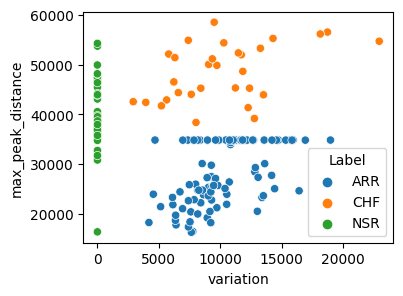

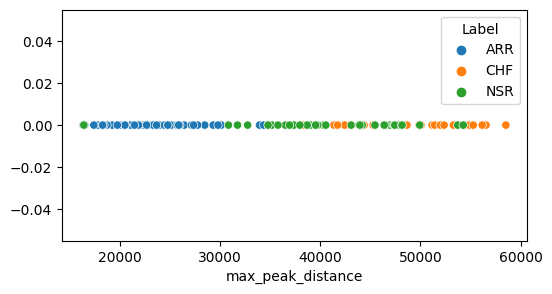

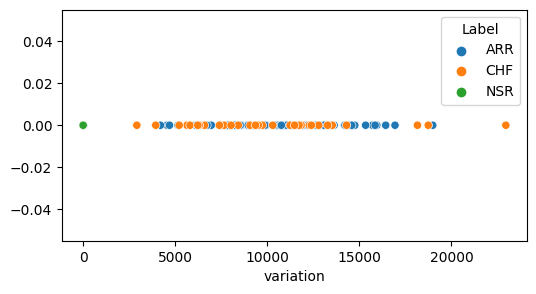

In [114]:
plt.figure(figsize=(4, 3))

sns.scatterplot(
    x=signal_features["variation"],
    y=signal_features["max_peak_distance"],
    #y=signal_features["max_peak_distance"],
    #y=0,
    hue=signal_features["Label"],
)

plt.figure(figsize=(6, 3))

sns.scatterplot(
    #x=signal_features["variation"],
    x=signal_features["max_peak_distance"],
    #y=signal_features["max_peak_distance"],
    y=0,
    hue=signal_features["Label"],
)

plt.figure(figsize=(6, 3))

sns.scatterplot(
    x=signal_features["variation"],
    #x=signal_features["max_peak_distance"],
    #y=signal_features["max_peak_distance"],
    y=0,
    hue=signal_features["Label"],
)